In [4]:
import csv
import pandas as pd
import clip
import torch
import numpy as np

In [ ]:
import open_clip
print(open_clip.list_pretrained())

model, _, preprocess = open_clip.create_model_and_transforms('ViT-H-14', pretrained='laion2b_s32b_b82k')


In [ ]:
[('RN50', 'openai'), ('RN50', 'yfcc15m'), ('RN50', 'cc12m'), ('RN50-quickgelu', 'openai'), ('RN50-quickgelu', 'yfcc15m'), ('RN50-quickgelu', 'cc12m'), ('RN101', 'openai'), ('RN101', 'yfcc15m'), ('RN101-quickgelu', 'openai'), ('RN101-quickgelu', 'yfcc15m'), ('RN50x4', 'openai'), ('RN50x16', 'openai'), ('RN50x64', 'openai'), ('ViT-B-32', 'openai'), ('ViT-B-32', 'laion400m_e31'), ('ViT-B-32', 'laion400m_e32'), ('ViT-B-32', 'laion2b_e16'), ('ViT-B-32', 'laion2b_s34b_b79k'), ('ViT-B-32', 'datacomp_xl_s13b_b90k'), ('ViT-B-32', 'datacomp_m_s128m_b4k'), ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'), ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'), ('ViT-B-32', 'commonpool_m_image_s128m_b4k'), ('ViT-B-32', 'commonpool_m_text_s128m_b4k'), ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'), ('ViT-B-32', 'commonpool_m_s128m_b4k'), ('ViT-B-32', 'datacomp_s_s13m_b4k'), ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'), ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'), ('ViT-B-32', 'commonpool_s_image_s13m_b4k'), ('ViT-B-32', 'commonpool_s_text_s13m_b4k'), ('ViT-B-32', 'commonpool_s_basic_s13m_b4k'), ('ViT-B-32', 'commonpool_s_s13m_b4k'), ('ViT-B-32-256', 'datacomp_s34b_b86k'), ('ViT-B-32-quickgelu', 'openai'), ('ViT-B-32-quickgelu', 'laion400m_e31'), ('ViT-B-32-quickgelu', 'laion400m_e32'), ('ViT-B-32-quickgelu', 'metaclip_400m'), ('ViT-B-32-quickgelu', 'metaclip_fullcc'), ('ViT-B-16', 'openai'), ('ViT-B-16', 'laion400m_e31'), ('ViT-B-16', 'laion400m_e32'), ('ViT-B-16', 'laion2b_s34b_b88k'), ('ViT-B-16', 'datacomp_xl_s13b_b90k'), ('ViT-B-16', 'datacomp_l_s1b_b8k'), ('ViT-B-16', 'commonpool_l_clip_s1b_b8k'), ('ViT-B-16', 'commonpool_l_laion_s1b_b8k'), ('ViT-B-16', 'commonpool_l_image_s1b_b8k'), ('ViT-B-16', 'commonpool_l_text_s1b_b8k'), ('ViT-B-16', 'commonpool_l_basic_s1b_b8k'), ('ViT-B-16', 'commonpool_l_s1b_b8k'), ('ViT-B-16', 'dfn2b'), ('ViT-B-16-quickgelu', 'metaclip_400m'), ('ViT-B-16-quickgelu', 'metaclip_fullcc'), ('ViT-B-16-plus-240', 'laion400m_e31'), ('ViT-B-16-plus-240', 'laion400m_e32'), ('ViT-L-14', 'openai'), ('ViT-L-14', 'laion400m_e31'), ('ViT-L-14', 'laion400m_e32'), ('ViT-L-14', 'laion2b_s32b_b82k'), ('ViT-L-14', 'datacomp_xl_s13b_b90k'), ('ViT-L-14', 'commonpool_xl_clip_s13b_b90k'), ('ViT-L-14', 'commonpool_xl_laion_s13b_b90k'), ('ViT-L-14', 'commonpool_xl_s13b_b90k'), ('ViT-L-14-quickgelu', 'metaclip_400m'), ('ViT-L-14-quickgelu', 'metaclip_fullcc'), ('ViT-L-14-quickgelu', 'dfn2b'), ('ViT-L-14-336', 'openai'), ('ViT-H-14', 'laion2b_s32b_b79k'), ('ViT-H-14-quickgelu', 'metaclip_fullcc'), ('ViT-H-14-quickgelu', 'dfn5b'), ('ViT-H-14-378-quickgelu', 'dfn5b'), ('ViT-g-14', 'laion2b_s12b_b42k'), ('ViT-g-14', 'laion2b_s34b_b88k'), ('ViT-bigG-14', 'laion2b_s39b_b160k'), ('roberta-ViT-B-32', 'laion2b_s12b_b32k'), ('xlm-roberta-base-ViT-B-32', 'laion5b_s13b_b90k'), ('xlm-roberta-large-ViT-H-14', 'frozen_laion5b_s13b_b90k'), ('convnext_base', 'laion400m_s13b_b51k'), ('convnext_base_w', 'laion2b_s13b_b82k'), ('convnext_base_w', 'laion2b_s13b_b82k_augreg'), ('convnext_base_w', 'laion_aesthetic_s13b_b82k'), ('convnext_base_w_320', 'laion_aesthetic_s13b_b82k'), ('convnext_base_w_320', 'laion_aesthetic_s13b_b82k_augreg'), ('convnext_large_d', 'laion2b_s26b_b102k_augreg'), ('convnext_large_d_320', 'laion2b_s29b_b131k_ft'), ('convnext_large_d_320', 'laion2b_s29b_b131k_ft_soup'), ('convnext_xxlarge', 'laion2b_s34b_b82k_augreg'), ('convnext_xxlarge', 'laion2b_s34b_b82k_augreg_rewind'), ('convnext_xxlarge', 'laion2b_s34b_b82k_augreg_soup'), ('coca_ViT-B-32', 'laion2b_s13b_b90k'), ('coca_ViT-B-32', 'mscoco_finetuned_laion2b_s13b_b90k'), ('coca_ViT-L-14', 'laion2b_s13b_b90k'), ('coca_ViT-L-14', 'mscoco_finetuned_laion2b_s13b_b90k'), ('EVA01-g-14', 'laion400m_s11b_b41k'), ('EVA01-g-14-plus', 'merged2b_s11b_b114k'), ('EVA02-B-16', 'merged2b_s8b_b131k'), ('EVA02-L-14', 'merged2b_s4b_b131k'), ('EVA02-L-14-336', 'merged2b_s6b_b61k'), ('EVA02-E-14', 'laion2b_s4b_b115k'), ('EVA02-E-14-plus', 'laion2b_s9b_b144k'), ('ViT-B-16-SigLIP', 'webli'), ('ViT-B-16-SigLIP-256', 'webli'), ('ViT-B-16-SigLIP-i18n-256', 'webli'), ('ViT-B-16-SigLIP-384', 'webli'), ('ViT-B-16-SigLIP-512', 'webli'), ('ViT-L-16-SigLIP-256', 'webli'), ('ViT-L-16-SigLIP-384', 'webli'), ('ViT-SO400M-14-SigLIP', 'webli'), ('ViT-SO400M-14-SigLIP-384', 'webli'), ('ViT-L-14-CLIPA', 'datacomp1b'), ('ViT-L-14-CLIPA-336', 'datacomp1b'), ('ViT-H-14-CLIPA', 'datacomp1b'), ('ViT-H-14-CLIPA-336', 'laion2b'), ('ViT-H-14-CLIPA-336', 'datacomp1b'), ('ViT-bigG-14-CLIPA', 'datacomp1b'), ('ViT-bigG-14-CLIPA-336', 'datacomp1b'), ('nllb-clip-base', 'v1'), ('nllb-clip-large', 'v1'), ('nllb-clip-base-siglip', 'v1'), ('nllb-clip-base-siglip', 'mrl'), ('nllb-clip-large-siglip', 'v1'), ('nllb-clip-large-siglip', 'mrl')]

In [3]:
channels = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
                        'F1', 'F2', 'F4', 'F6', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 
                        'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 'C5', 'C3', 'C1',
                        'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 
                        'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P7', 'P5', 'P3', 'P1',
                        'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8',
                        'O1', 'Oz', 'O2']
selected_ch = ['P7', 'P5', 'P3', 'P1','Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8','O1', 'Oz', 'O2']
[channels.index(ch) for ch in selected_ch]

[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]

In [15]:
# path = '/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/test.pt'
# data = torch.load(path)
# print(data['eeg'].shape)
path = '/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/preprocessed_eeg_test.npy'
all_data = np.load(path, allow_pickle=True)
data = all_data['preprocessed_eeg_data']
print(data.shape)

# data_tensor = data.reshape((-1, *data.shape[2:]))
data_tensor = data
print(data_tensor.shape)
test_dict = {'eeg':data_tensor.astype(np.float16)}

torch.save(test_dict, '/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/tmp.pt', pickle_protocol=5)
# with open('/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/tmp.pt', 'wb') as f:
#         torch.save(test_dict, f, pickle_protocol=5)
# torch.save(test_dict, )
# path = '/dev/shm/wht/datasets/things-eeg-small/Preprocessed_data_250Hz_no_whiten/sub-08/test.pt'
# data = torch.load(path)
# data['eeg'].shape

(200, 80, 63, 250)
(200, 80, 63, 250)


In [1]:
import torch
import torch.nn as nn

# Step 1: Prepare the data
batch_size = 32
channels = 63
time_steps = 250

input_data = torch.randn(batch_size, channels, time_steps)
input_data = input_data.permute(0, 2, 1)

# Step 2: Define the RNN model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, feature_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, feature_size)
        
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Model parameters
input_size = channels  # Number of features (channels)
hidden_size = 128  # Number of features in the hidden state
num_layers = 2  # Number of stacked LSTM layers
feature_size = 512  # Output feature size

model = LSTMModel(input_size, hidden_size, num_layers, feature_size)

# Step 3: Forward pass
input_data = torch.randn(batch_size, time_steps, channels)
output = model(input_data)
print(output.shape)  # Should be (batch_size, feature_size)

torch.Size([32, 512])


In [3]:
with open('/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/tmp.pt', 'wb') as f:
        torch.save({'eeg':data['eeg']}, f, pickle_protocol=5)

In [10]:
type(data['eeg'][0])

numpy.ndarray

In [11]:
import numpy as np
import pickle
import time

# 创建一个示例 NumPy 数组
data = np.random.rand(6000, 63, 250)

# 测试序列化时间
start_time = time.time()
data_bytes = pickle.dumps(data)
end_time = time.time()
print(f"序列化时间: {end_time - start_time} 秒")

# 测试反序列化时间
start_time = time.time()
retrieved_data = pickle.loads(data_bytes)
end_time = time.time()
print(f"反序列化时间: {end_time - start_time} 秒")


序列化时间: 8.578072786331177 秒
反序列化时间: 4.262956857681274 秒


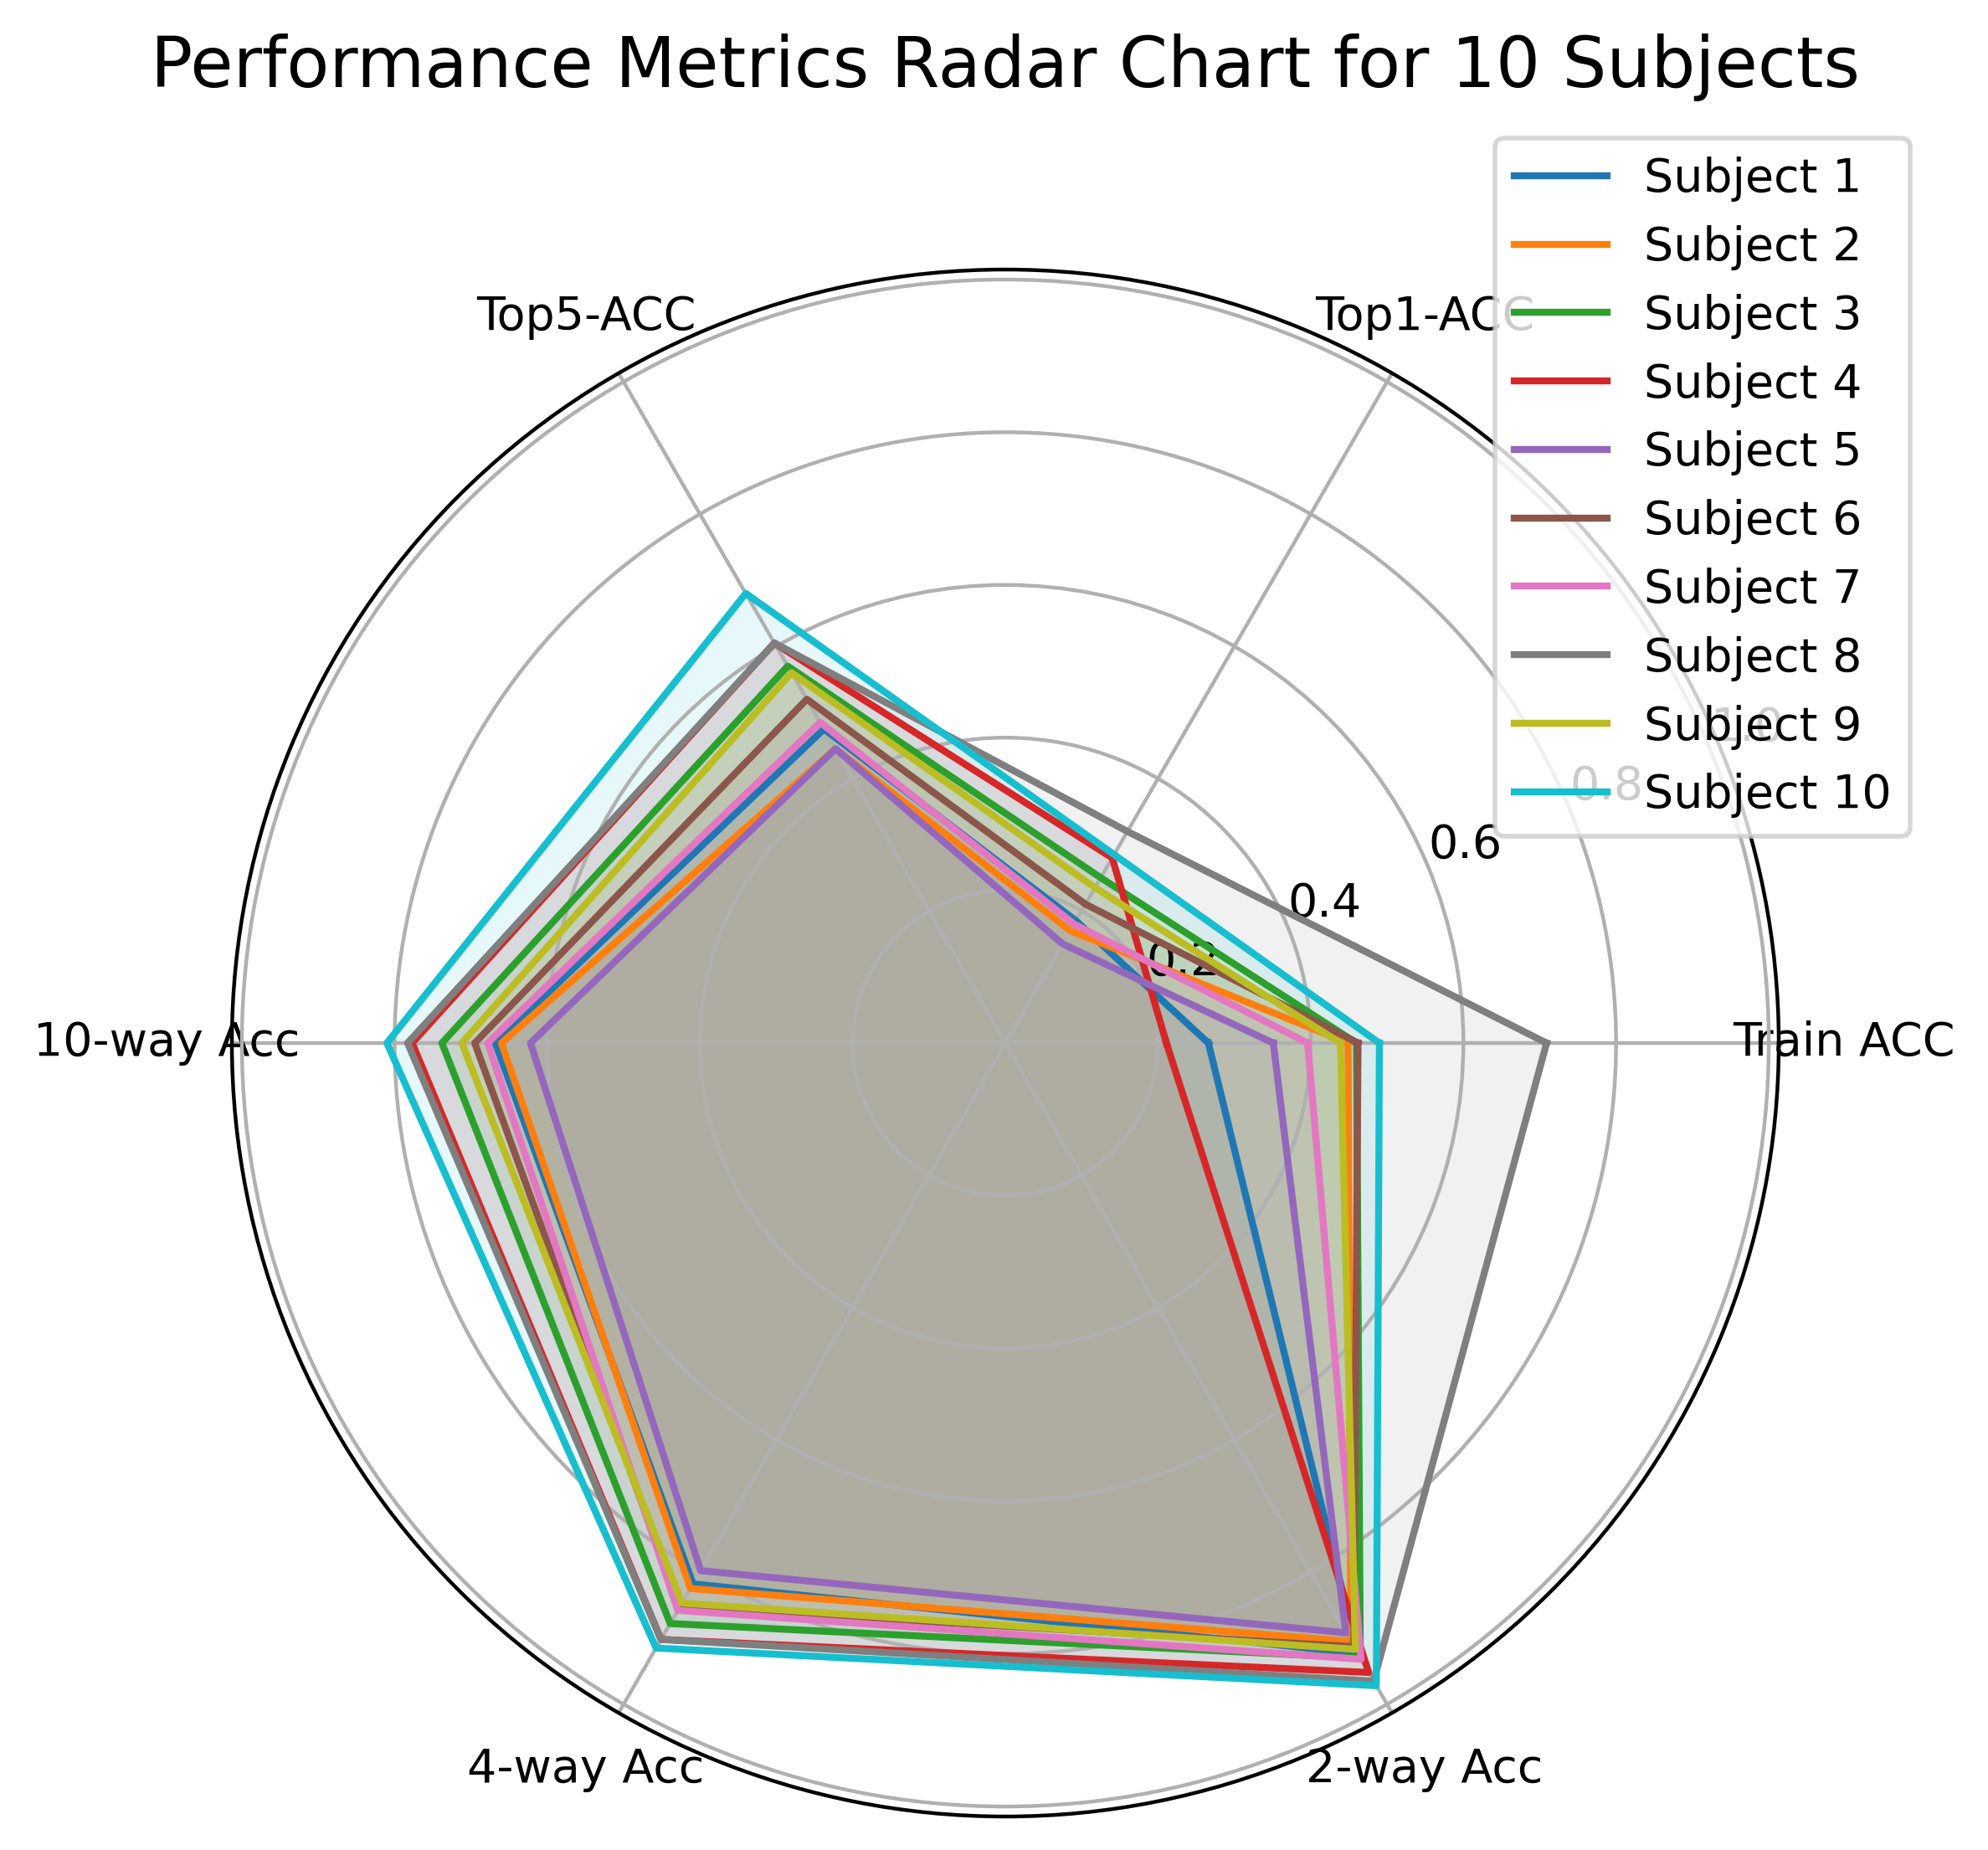

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from math import pi

categories = ['Train ACC', 'Top1-ACC', 'Top5-ACC', '10-way Acc', '4-way Acc', '2-way Acc']
num_vars = len(categories)

data = {
    'Subject 1': [0.266, 0.185, 0.475, 0.668, 0.818, 0.923],
    'Subject 2': [0.449, 0.170, 0.445, 0.660, 0.825, 0.905],
    'Subject 3': [0.460, 0.250, 0.570, 0.738, 0.878, 0.930],
    'Subject 4': [0.211, 0.280, 0.605, 0.777, 0.902, 0.952],
    'Subject 5': [0.351, 0.150, 0.445, 0.622, 0.798, 0.892],
    'Subject 6': [0.462, 0.210, 0.520, 0.695, 0.853, 0.913],
    'Subject 7': [0.396, 0.180, 0.485, 0.678, 0.858, 0.932],
    'Subject 8': [0.709, 0.320, 0.605, 0.783, 0.902, 0.965],
    'Subject 9': [0.439, 0.235, 0.560, 0.712, 0.847, 0.917],
    'Subject 10': [0.490, 0.285, 0.680, 0.810, 0.915, 0.972],
}

labels = list(data.keys())
values = [data[subject] for subject in labels]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True),dpi=400)

for i, value in enumerate(values):
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    value += value[:1] 
    angles += angles[:1]
    ax.plot(angles, value, label=labels[i])
    ax.fill(angles, value, alpha=0.1)

plt.xticks(angles[:-1], categories)

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
plt.title('Performance Metrics Radar Chart for 10 Subjects', size=15, color='black', y=1.1)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [2]:
# import clip
# clip.available_models()
import open_clip
print(len(open_clip.list_pretrained()))
print(open_clip.list_pretrained())

123
[('RN50', 'openai'), ('RN50', 'yfcc15m'), ('RN50', 'cc12m'), ('RN50-quickgelu', 'openai'), ('RN50-quickgelu', 'yfcc15m'), ('RN50-quickgelu', 'cc12m'), ('RN101', 'openai'), ('RN101', 'yfcc15m'), ('RN101-quickgelu', 'openai'), ('RN101-quickgelu', 'yfcc15m'), ('RN50x4', 'openai'), ('RN50x16', 'openai'), ('RN50x64', 'openai'), ('ViT-B-32', 'openai'), ('ViT-B-32', 'laion400m_e31'), ('ViT-B-32', 'laion400m_e32'), ('ViT-B-32', 'laion2b_e16'), ('ViT-B-32', 'laion2b_s34b_b79k'), ('ViT-B-32', 'datacomp_xl_s13b_b90k'), ('ViT-B-32', 'datacomp_m_s128m_b4k'), ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'), ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'), ('ViT-B-32', 'commonpool_m_image_s128m_b4k'), ('ViT-B-32', 'commonpool_m_text_s128m_b4k'), ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'), ('ViT-B-32', 'commonpool_m_s128m_b4k'), ('ViT-B-32', 'datacomp_s_s13m_b4k'), ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'), ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'), ('ViT-B-32', 'commonpool_s_image_s13m_b4k'), ('ViT

In [2]:
import numpy as np

# 假设输入的EEG信号数据为 eeg_data，形状为 (63, 250)
eeg_data = np.random.rand(63, 250)  # 示例数据

# 对每个通道进行傅里叶变换
fft_data = np.fft.fft(eeg_data, axis=1)
print(fft_data)
# 频域信号
print("频域信号形状:", fft_data.shape)

[[128.03939379+0.j          -2.9001663 +0.58060276j
    2.78672752-1.00040717j ...  -3.59804679-2.90374792j
    2.78672752+1.00040717j  -2.9001663 -0.58060276j]
 [120.4550936 +0.j          -3.41066053+1.38859283j
    3.50804937+6.28531409j ...  -0.17691389-1.55933054j
    3.50804937-6.28531409j  -3.41066053-1.38859283j]
 [124.94079244+0.j           2.83668969+3.02783686j
   -0.80665137+0.88310731j ...   4.13735953-1.66296164j
   -0.80665137-0.88310731j   2.83668969-3.02783686j]
 ...
 [125.26457138+0.j          -6.38429975+6.3011408j
   -1.42413161+0.97766631j ...   6.23812569-0.30107416j
   -1.42413161-0.97766631j  -6.38429975-6.3011408j ]
 [118.25749483+0.j           6.42190768-1.74652186j
   -3.62795684-2.30416823j ...   7.76563159+0.14898778j
   -3.62795684+2.30416823j   6.42190768+1.74652186j]
 [129.86689643+0.j         -10.85083622+0.09770036j
   -0.23318224+5.17875684j ...  -1.42831475-2.75097408j
   -0.23318224-5.17875684j -10.85083622-0.09770036j]]
频域信号形状: (63, 250)


In [3]:
import torch

# 假设输入的EEG信号数据为 eeg_data，形状为 (63, 250)
eeg_data = torch.rand(63, 250)  # 示例数据

# 对每个通道进行傅里叶变换
fft_data = torch.fft.fft(eeg_data, dim=1)

# 频域信号
print("频域信号形状:", fft_data.shape)

# 计算频域信号的幅值
magnitude_spectrum = torch.abs(fft_data)

print("幅值谱形状:", magnitude_spectrum.shape)


频域信号形状: torch.Size([63, 250])
幅值谱形状: torch.Size([63, 250])


In [1]:
import numpy as np
z = np.ones((3,2,1))
z = z + np.array([1,2]).reshape(1,2,1)
print(z)

[[[2.]
  [3.]]

 [[2.]
  [3.]]

 [[2.]
  [3.]]]


In [5]:
a =[1]
print(a[:-1])
print(a[-1])
mask_ratio=0.75
L=10
len_keep = int(L * (1 - mask_ratio))
len_keep

[]
1


2

In [22]:
import numpy as np
import time


matrix = np.random.rand(63, 250)
times=[0.,0.,0.]
start_time1 = time.time()
for i in range(60000):
    start_time = time.time()
    vector = matrix.flatten()
    end_time = time.time()
    times[0] +=end_time-start_time
    # 测量重构时间
    start_time = time.time()
    retrieved_matrix = np.array(vector).reshape((63, 250))
    end_time = time.time()
    times[1] +=end_time-start_time
    
end_time1= time.time()
times[2] =end_time1-start_time1
print(f"Time: {times} seconds")

Time: [0.24982786178588867, 0.25635719299316406, 0.5386717319488525] seconds


In [ ]:
data.key()

<function clip.clip.tokenize(texts: Union[str, List[str]], context_length: int = 77, truncate: bool = False) -> Union[torch.IntTensor, torch.LongTensor]>

In [3]:
df = pd.read_csv('../datasets/things_concepts.tsv', delimiter='\t')
df

,Word,uniqueID,Example image,Bigram,Percent_known,Rank (combining COCA/concreteness),Concreteness (M),COCA word freq (online),COCA word freq,COCA (dispersion),...,Top-down Category (WordNet),Top-down Category (manual selection),All Bottom-up Categories,WordNet Synonyms,WordNet ID,Wordnet ID2,Wordnet ID3,Wordnet ID4,"Definition (from WordNet, Google, or Wikipedia)",Number of word meanings in list
0,aardvark,aardvark,https://imgur.com/LAJGlN0,0,1.00,18158.5,4.68,53,28.0,0.78,...,animal,animal,animal,"aardvark, ant_bear, anteater, Orycteropus_afer",n02082791,aardvark%1:05:00::,aardvark#1,aardvark.n.01,nocturnal burrowing mammal of the grasslands o...,1
1,abacus,abacus,https://imgur.com/peZeM0l,0,0.93,17741.0,4.52,188,97.0,0.86,...,NaN,home decor,mathematical device,abacus,n02666196,abacus%1:06:00::,abacus#2,abacus.n.02,a calculator that performs arithmetic function...,1
2,accordion,accordion,https://imgur.com/GgGvdZR,0,0.97,8541.0,4.86,816,735.0,0.90,...,musical instrument,musical instrument,musical instrument,"accordion, piano_accordion, squeeze_box",n02672831,accordion%1:06:00::,accordion#1,accordion.n.01,a portable box-shaped free-reed instrument; th...,1
3,acorn,acorn,https://imgur.com/YfIB5lM,0,1.00,7723.5,4.96,1289,692.0,0.85,...,fruit,NaN,nut,acorn,n12267677,acorn%1:20:00::,acorn#1,acorn.n.01,fruit of the oak tree: a smooth thin-walled nu...,1
4,air conditioner,air_conditioner,https://imgur.com/KqYNwWH,1,1.00,12115.0,4.93,943,NaN,NaN,...,NaN,electronic device,home appliance,"air_conditioner, air_conditioning",n02686379,air_conditioner%1:06:00::,air_conditioner#1,air_conditioner.n.01,a system that keeps air cool and dry,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,yoke,yoke,https://imgur.com/nOt3K3f,0,0.97,9558.5,4.83,692,597.0,0.90,...,NaN,NaN,"farm equipment, animal harness",yoke,n04612840,yoke%1:06:00::,yoke#7,yoke.n.07,stable gear that joins two draft animals at th...,1
1850,yolk,yolk,https://imgur.com/gWY0jPO,0,0.96,7970.5,4.78,881,1224.0,0.89,...,food,food,part of egg,"egg_yolk, yolk",n07841345,yolk%1:13:00::,yolk#1,yolk.n.01,the yellow spherical part of an egg that is su...,1
1851,zebra,zebra,https://imgur.com/xg5AAHb,0,1.00,8136.5,4.86,1066,839.0,0.87,...,animal,animal,animal,zebra,n02391049,zebra%1:05:00::,zebra#1,zebra.n.01,any of several fleet black-and-white striped A...,1
1852,zipper,zipper,https://imgur.com/T2RLBxe,0,1.00,6954.5,4.83,1478,1452.0,0.88,...,NaN,NaN,fastener,"slide_fastener, zip, zipper, zip_fastener",n04238321,zipper%1:06:00::,zipper#1,zipper.n.01,a fastener for locking together two toothed ed...,1


In [11]:
df = pd.read_csv('../datasets/category_mat_bottom_up.tsv', delimiter='\t')
print(df.columns)
print((df.sum(axis=1) > 1).sum())

Index(['animal', 'bird', 'body part', 'clothing', 'clothing accessory',
       'container', 'dessert', 'drink', 'electronic device', 'food', 'fruit',
       'furniture', 'home decor', 'insect', 'kitchen appliance',
       'kitchen tool', 'medical equipment', 'musical instrument',
       'office supply', 'part of car', 'plant', 'sports equipment', 'tool',
       'toy', 'vegetable', 'vehicle', 'weapon'],
      dtype='object')
34


In [12]:
df = pd.read_csv('../datasets/category_mat_manual.tsv', delimiter='\t')
print(df.columns)
print((df.sum(axis=1) > 1).sum())
df = pd.read_csv('../datasets/category_mat_top_down.tsv', delimiter='\t')
print(df.columns)
print((df.sum(axis=1) > 1).sum())

Index(['animal', 'bird', 'body part', 'clothing', 'clothing accessory',
       'container', 'dessert', 'drink', 'electronic device', 'food', 'fruit',
       'furniture', 'home decor', 'insect', 'kitchen appliance',
       'kitchen tool', 'medical equipment', 'musical instrument',
       'office supply', 'part of car', 'plant', 'sports equipment', 'tool',
       'toy', 'vegetable', 'vehicle', 'weapon'],
      dtype='object')
302
Index(['animal', 'bird', 'body part', 'clothing', 'clothing accessory',
       'container', 'dessert', 'drink', 'electronic device', 'food', 'fruit',
       'furniture', 'home decor', 'insect', 'kitchen appliance',
       'kitchen tool', 'medical equipment', 'musical instrument',
       'office supply', 'part of car', 'plant', 'sports equipment', 'tool',
       'toy', 'vegetable', 'vehicle', 'weapon'],
      dtype='object')
98


In [7]:
from PIL import Image
from torchvision import transforms
import numpy as np
transform = transforms.ToTensor()
img=Image.open('/root/workspace/wht/multimodal_brain/datasets/things/THINGS/Images/aardvark/aardvark_02s.jpg').convert("RGB")
# transform(img)
np.array(img)/255.0

array([[[0.31764706, 0.20784314, 0.12156863],
        [0.30980392, 0.2       , 0.11372549],
        [0.30196078, 0.19215686, 0.10588235],
        ...,
        [0.32941176, 0.21176471, 0.11764706],
        [0.3254902 , 0.20784314, 0.11372549],
        [0.3254902 , 0.20784314, 0.11372549]],

       [[0.31764706, 0.20784314, 0.12156863],
        [0.31372549, 0.20392157, 0.11764706],
        [0.30588235, 0.19607843, 0.10980392],
        ...,
        [0.33333333, 0.21568627, 0.12156863],
        [0.33333333, 0.21568627, 0.12156863],
        [0.32941176, 0.21176471, 0.11764706]],

       [[0.32156863, 0.21176471, 0.1254902 ],
        [0.31764706, 0.20784314, 0.12156863],
        [0.30980392, 0.2       , 0.11372549],
        ...,
        [0.34117647, 0.22352941, 0.12941176],
        [0.34117647, 0.22352941, 0.12941176],
        [0.3372549 , 0.21960784, 0.1254902 ]],

       ...,

       [[0.67058824, 0.50980392, 0.38431373],
        [0.72941176, 0.57254902, 0.43529412],
        [0.59215686, 0

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        return sample


In [5]:
#2 x 4 x3
import numpy as np
m = np.zeros((2,4,3),dtype=np.int32)
_=0
for i in range(2):
    for j in range(4):
        for k in range(3):
            m[i,j,k]=_
            _+=1
print(m)
m.reshape(-1,2,3)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]


array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]], dtype=int32)

In [7]:
data = [1, 2, 3, 4]

# 使用 numpy.tile 重复4次
repeated_data = np.tile(data, 4)

print(repeated_data)
print(np.repeat(data, 4))

[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


In [9]:
ele ={'a':1,'b':2}
for k in ele:
    print(k)

a
b
